# Es 6

### Energia interna

<ipython-input-73-f973eb1012a3>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


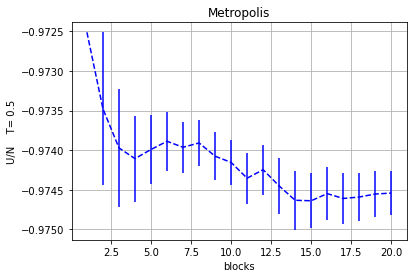

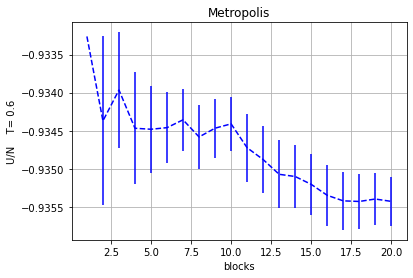

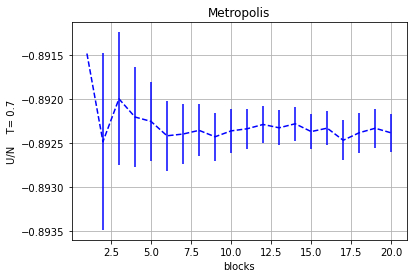

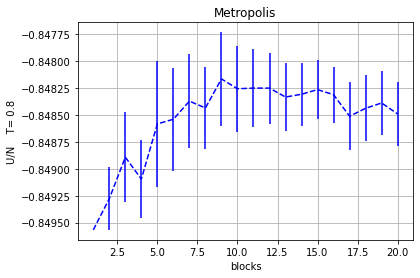

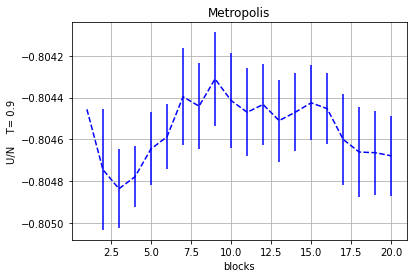

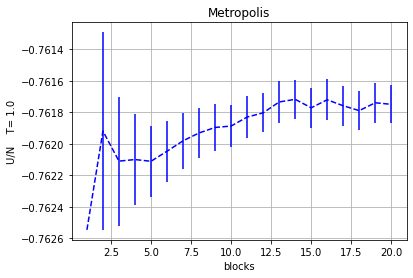

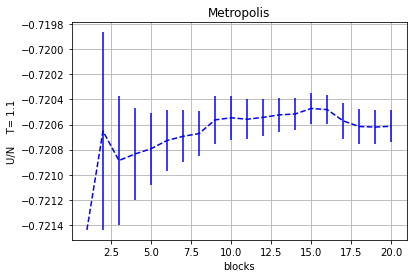

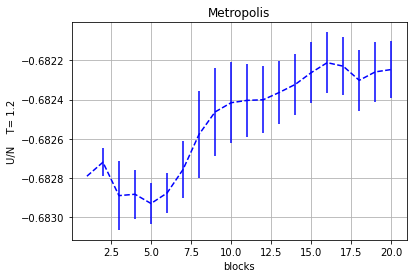

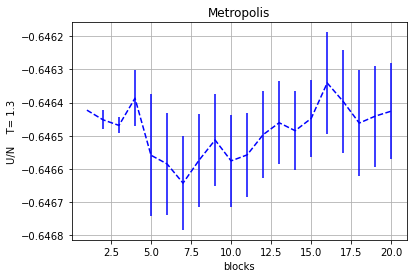

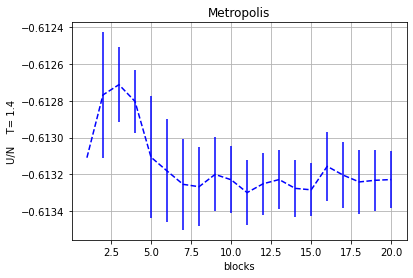

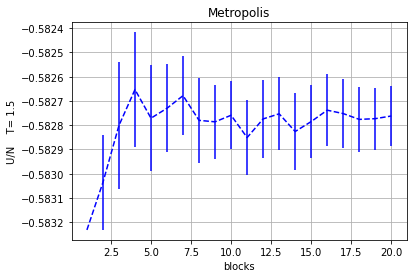

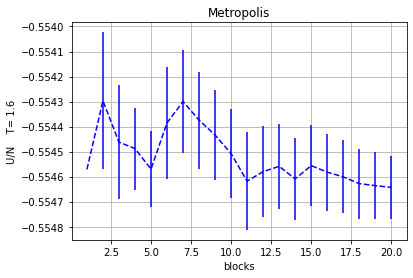

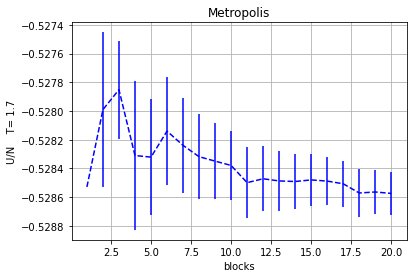

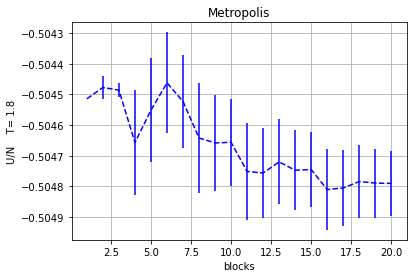

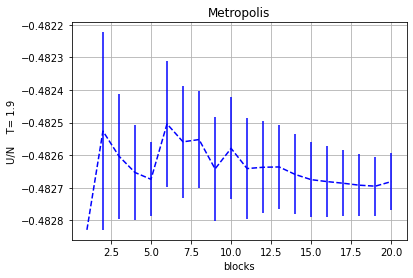

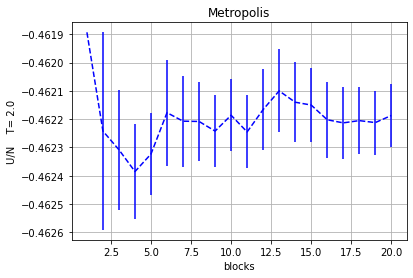

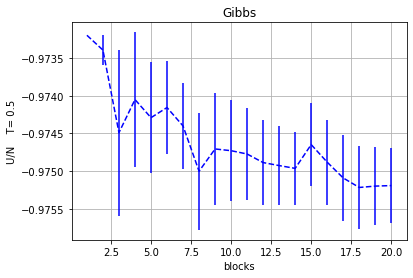

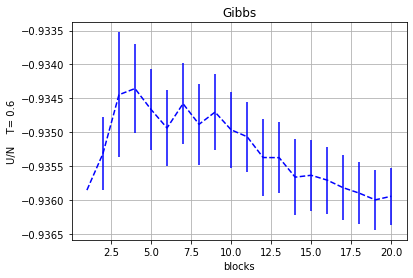

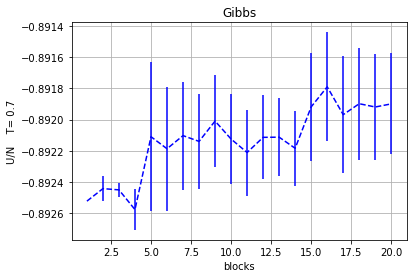

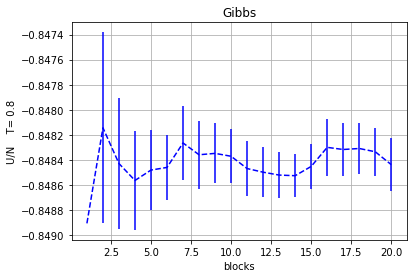

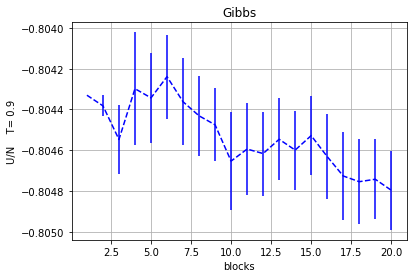

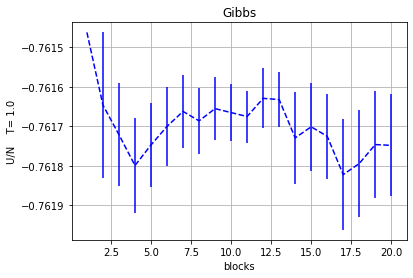

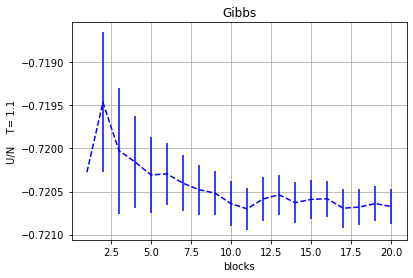

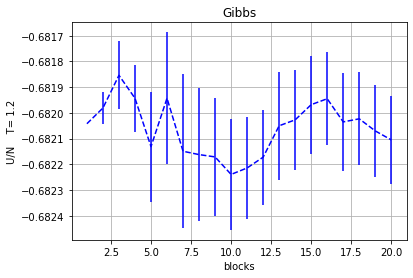

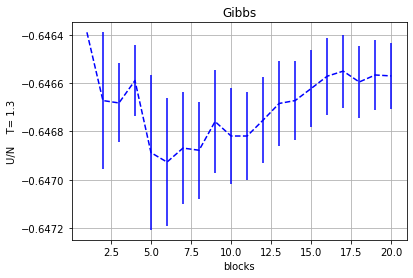

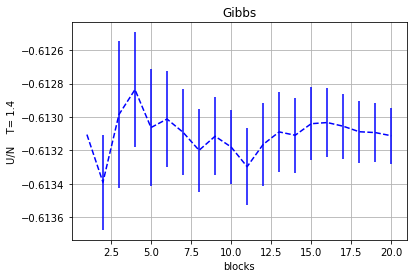

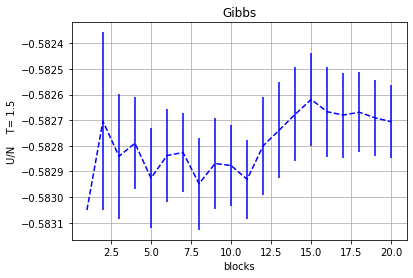

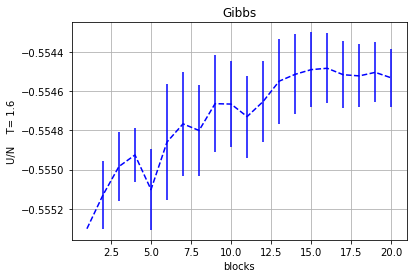

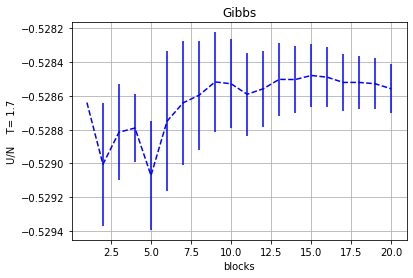

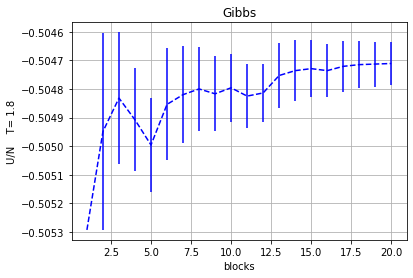

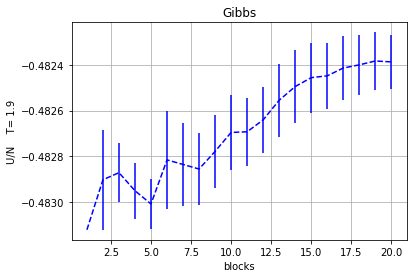

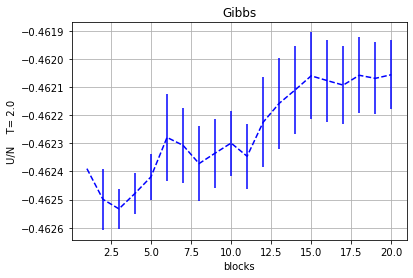

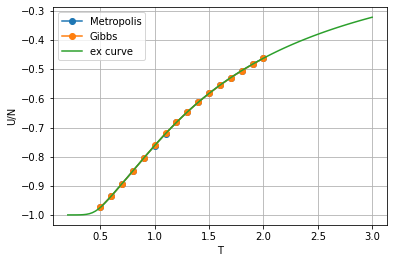

In [73]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import math
import decimal


nblock=20
passoT=0.5
npassi=int(2/passoT)


with open("ISING_1D/output.ene.0","r") as file:
    s=file.read()
    s=s.split("\n")
    l=[line.split(" ") for line in s]
    ll=[x for el in l for x in el if x!=""]
    

block=[float(i) for i in ll[::4]]
v=[float(i) for i in ll[2::4]]
err=[float(i) for i in ll[3::4]]
TT=[i/10+0.5 for i in range(16)] 

TT=TT*int(len(v)/20)
for i in range(int(len(v)/20)):
    plt.errorbar(block[i*20:i*20+20],v[i*20:i*20+20], yerr=err[i*20:i*20+20:],linestyle="dashed",color="blue")
    if(i<=15):
        plt.title("Metropolis")
    else:
        plt.title("Gibbs")
    plt.xlabel('blocks')
    plt.ylabel("U/N    T= "+str(TT[i]))
    plt.grid(True)
    plt.figure()
    
plt.plot(TT[:16],v[19:int(len(v)/2):20],marker='o', label='Metropolis')
plt.plot(TT[:16],v[int(len(v)/2)::20],marker='o', label='Gibbs')
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label='ex curve')
plt.xlabel("T")
plt.ylabel("U/N")
plt.legend()
plt.grid(True)
plt.show()



### $\chi$ 

<ipython-input-76-57141bbd90ac>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


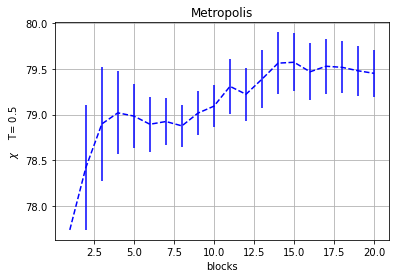

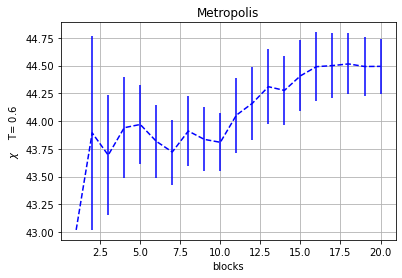

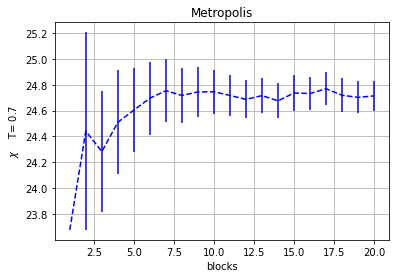

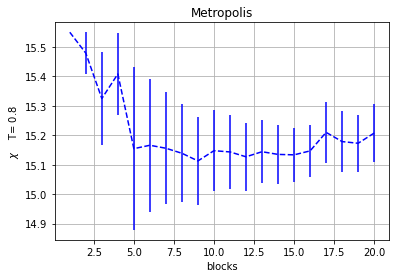

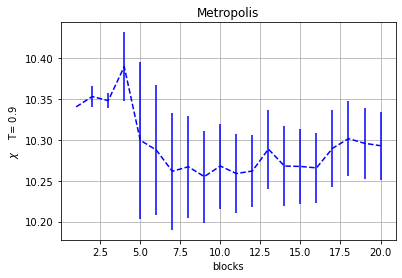

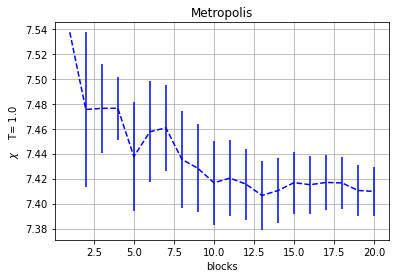

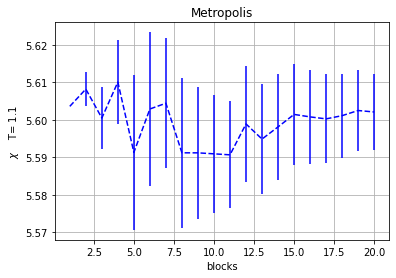

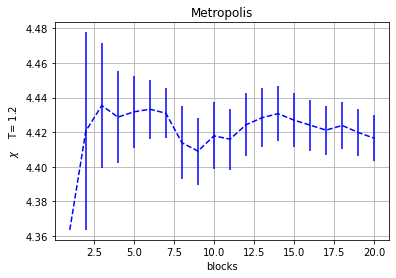

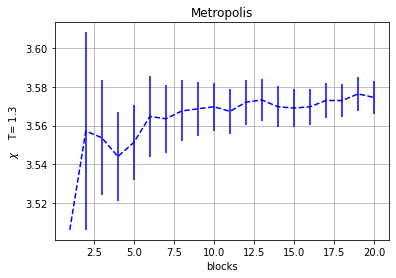

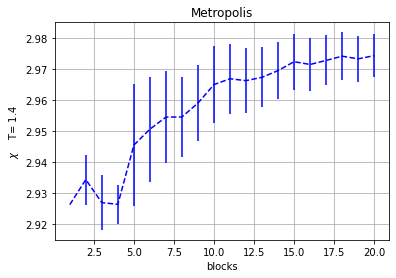

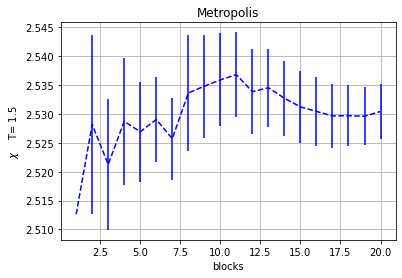

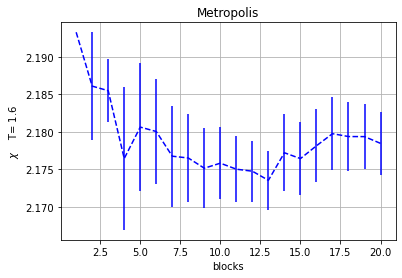

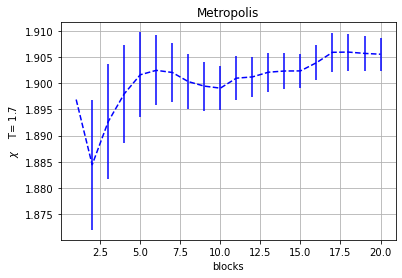

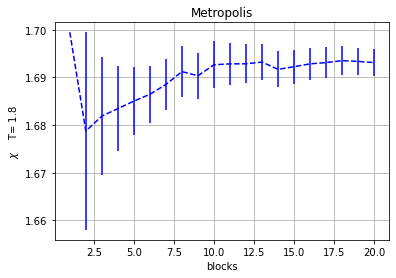

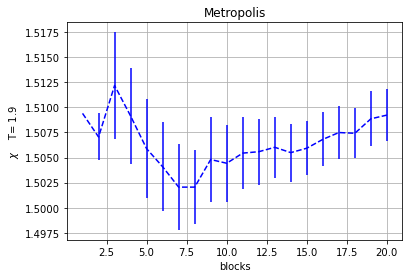

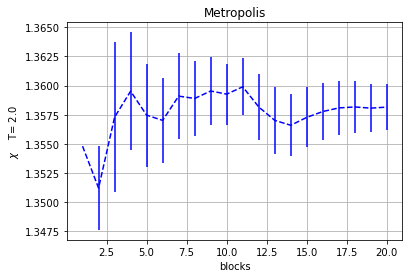

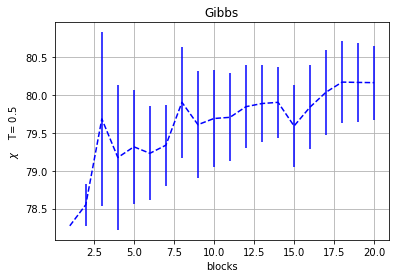

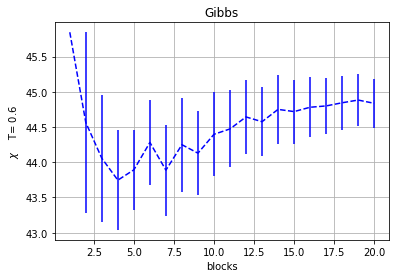

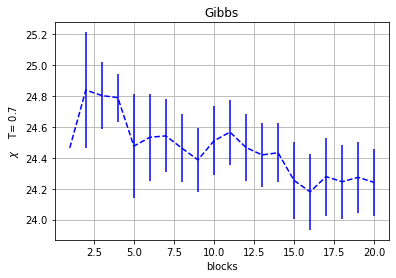

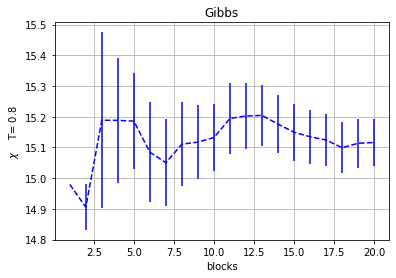

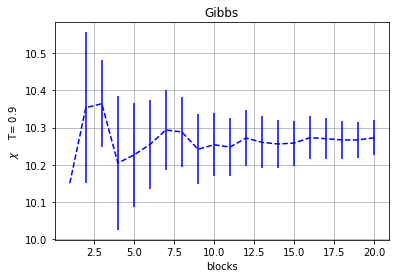

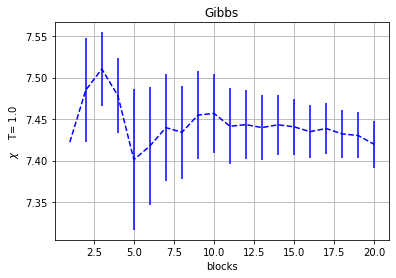

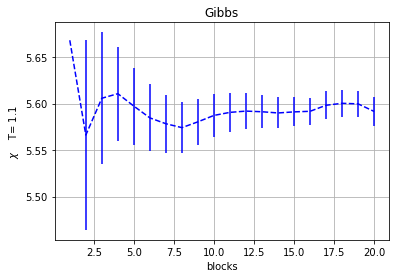

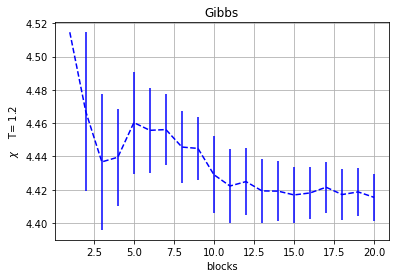

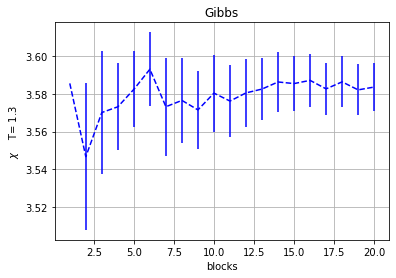

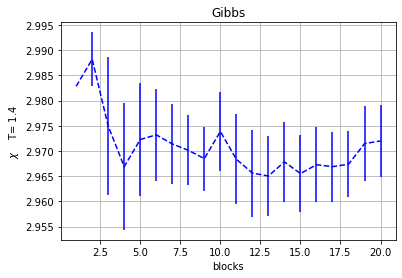

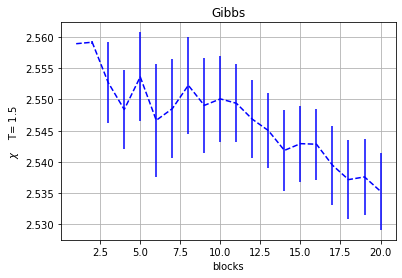

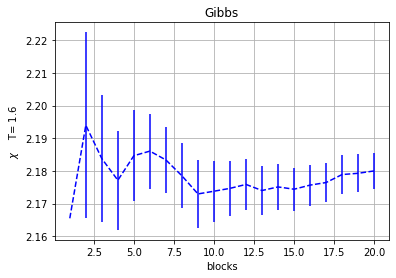

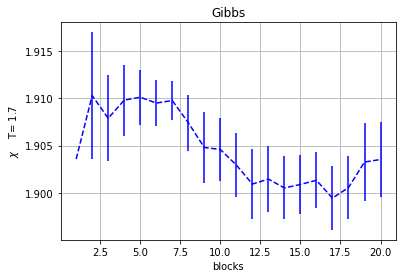

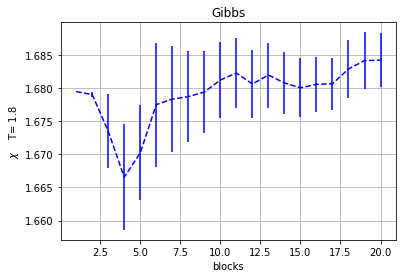

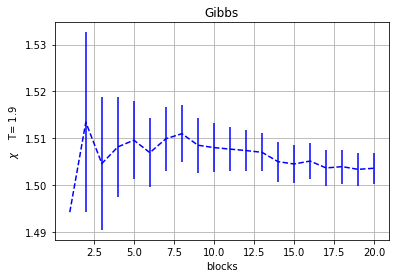

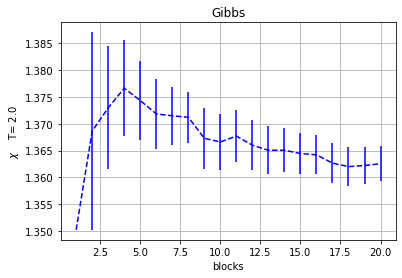

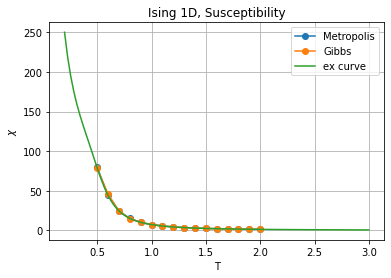

In [76]:
with open("ISING_1D/output.chi.0","r") as file:
    s=file.read()
    s=s.split("\n")
    l=[line.split(" ") for line in s]
    ll=[x for el in l for x in el if x!=""]
    

block=[float(i) for i in ll[::4]]
v=[float(i) for i in ll[2::4]]
err=[float(i) for i in ll[3::4]]
TT=[i/10+0.5 for i in range(16)] 

TT=TT*int(len(v)/20)
for i in range(int(len(v)/20)):
    plt.errorbar(block[i*20:i*20+20],v[i*20:i*20+20], yerr=err[i*20:i*20+20:],linestyle="dashed",color="blue")
    if(i<=15):
        plt.title("Metropolis")
    else:
        plt.title("Gibbs")
    plt.xlabel('blocks')
    plt.ylabel("$\chi$    T= "+str(TT[i]))
    plt.grid(True)
    plt.figure()
    
plt.plot(TT[:16],v[19:int(len(v)/2):20],marker='o', label='Metropolis')
plt.plot(TT[:16],v[int(len(v)/2)::20],marker='o', label='Gibbs')
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label='ex curve')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)

plt.show()


### Magnetizzazione

<ipython-input-77-966a650ff778>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


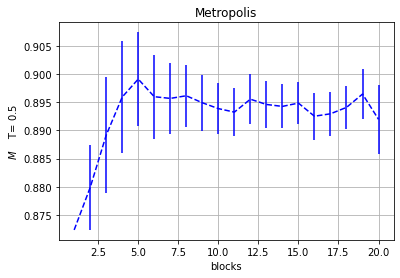

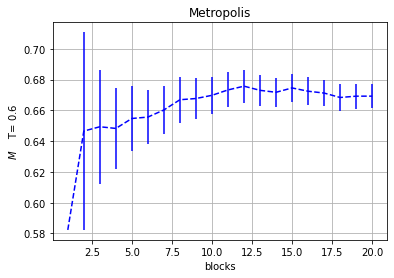

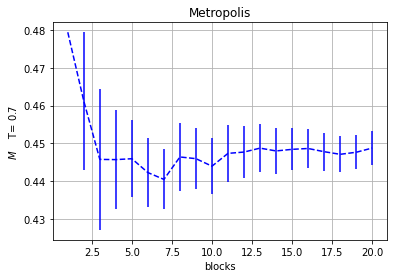

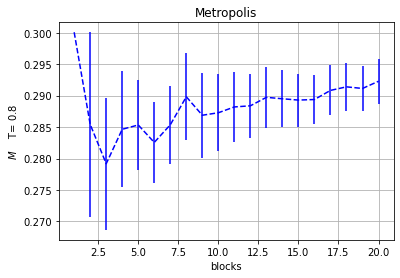

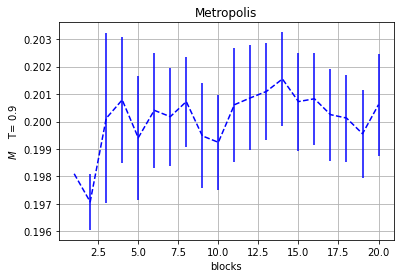

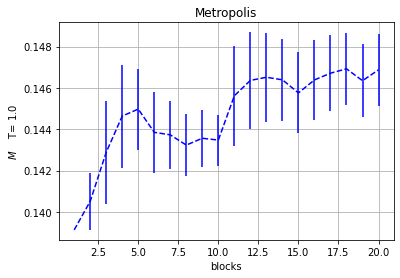

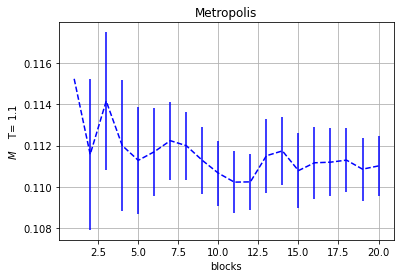

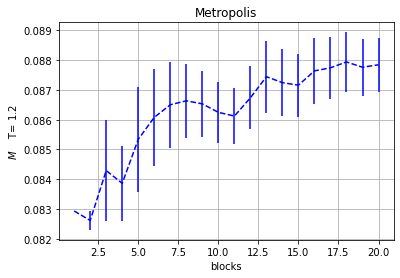

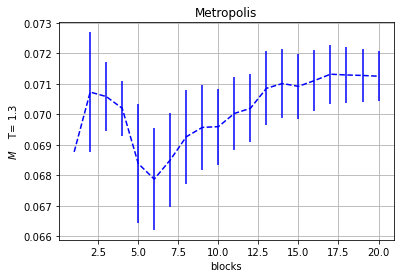

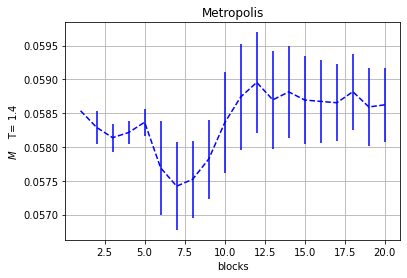

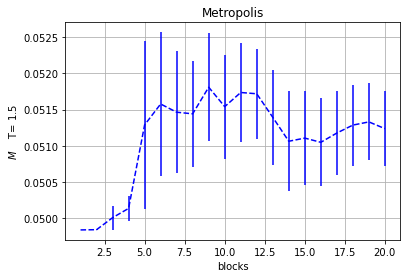

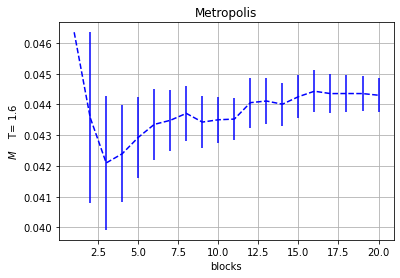

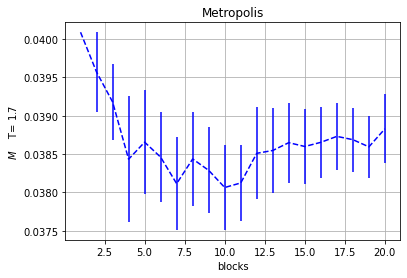

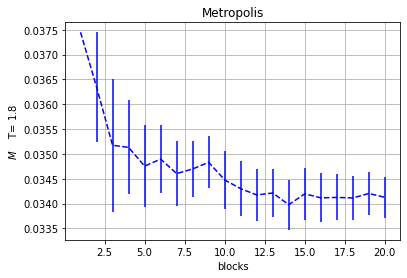

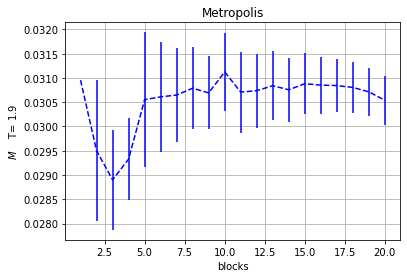

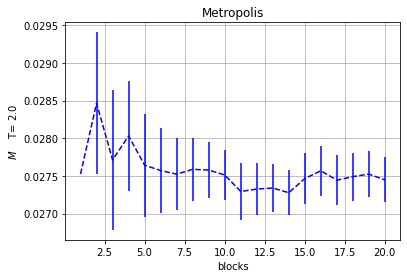

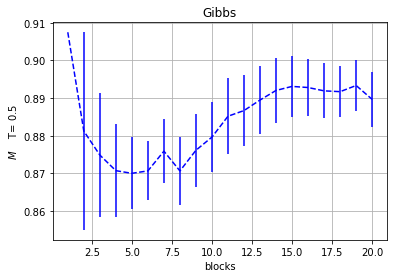

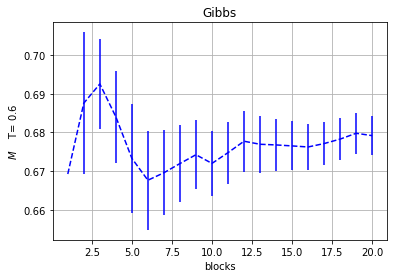

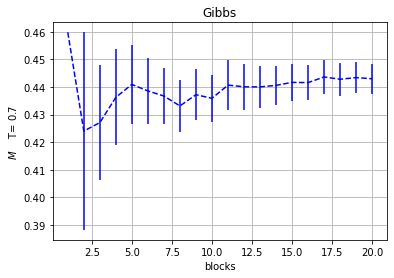

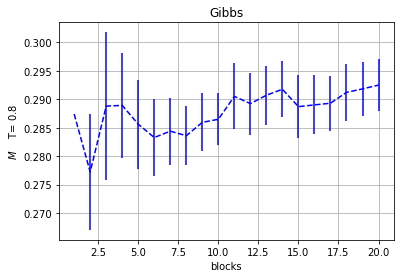

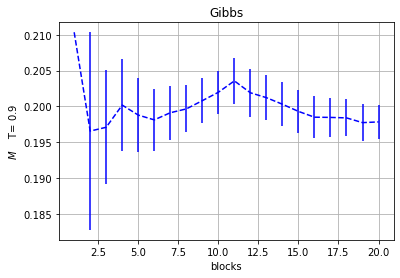

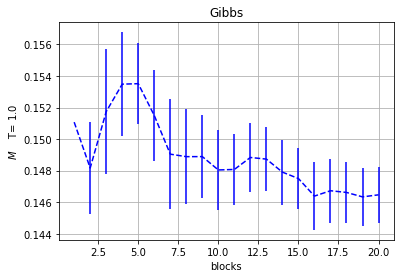

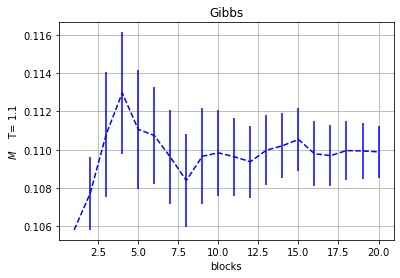

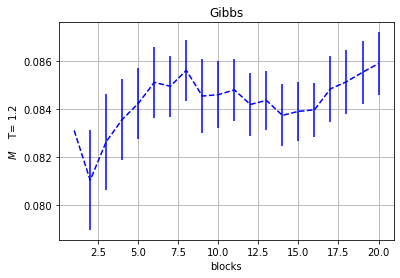

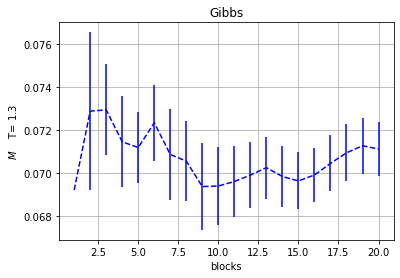

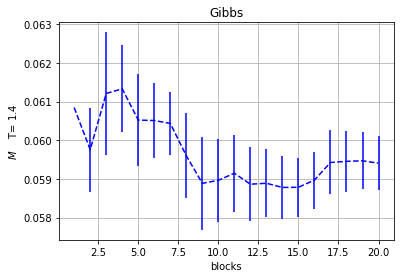

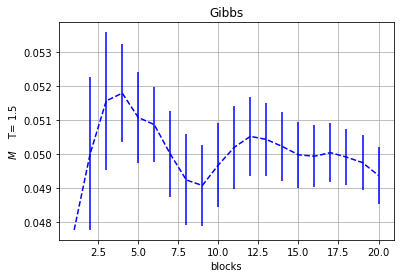

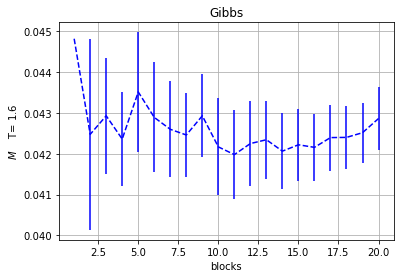

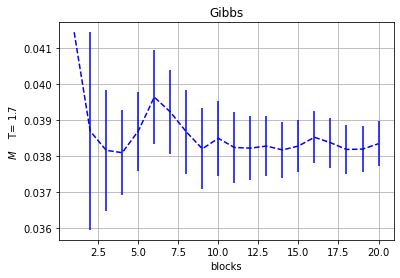

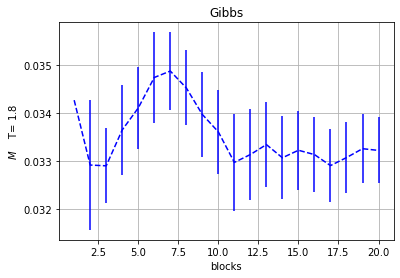

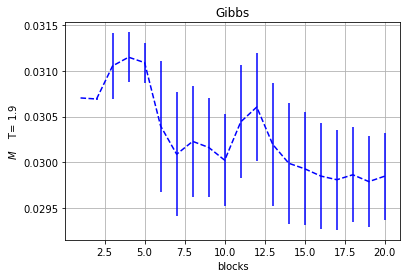

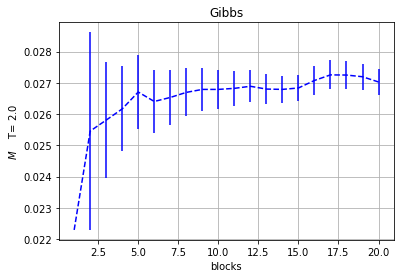

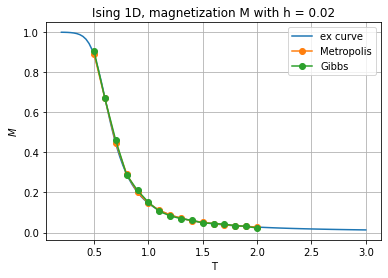

In [77]:
with open("ISING_1D/output.mag.0","r") as file:
    s=file.read()
    s=s.split("\n")
    l=[line.split(" ") for line in s]
    ll=[x for el in l for x in el if x!=""]
    

block=[float(i) for i in ll[::4]]
v=[float(i) for i in ll[2::4]]
err=[float(i) for i in ll[3::4]]
TT=[i/10+0.5 for i in range(16)] 

TT=TT*int(len(v)/20)
for i in range(int(len(v)/20)):
    plt.errorbar(block[i*20:i*20+20],v[i*20:i*20+20], yerr=err[i*20:i*20+20:],linestyle="dashed",color="blue")
    if(i<=15):
        plt.title("Metropolis")
    else:
        plt.title("Gibbs")
    plt.xlabel('blocks')
    plt.ylabel("$M$    T= "+str(TT[i]))
    plt.grid(True)
    plt.figure()
    
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.plot(T, M,label='ex curve')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.plot(TT[:16],v[19:int(len(v)/2):20],marker='o', label='Metropolis')
plt.plot(TT[:16],v[int(len(v)/2)::20],marker='o', label='Gibbs')
plt.legend()
plt.grid(True)
plt.show()


### CapacitÃ 

<ipython-input-81-132004d2d96f>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


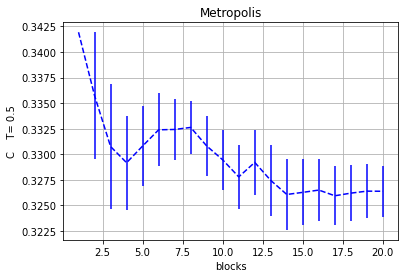

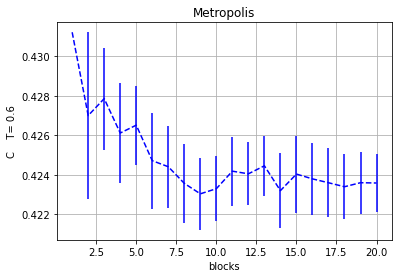

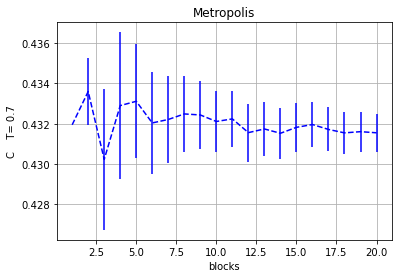

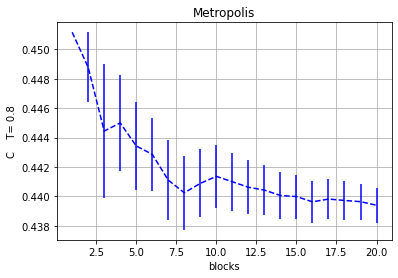

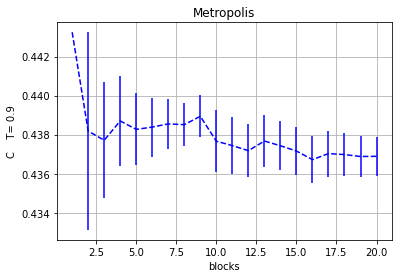

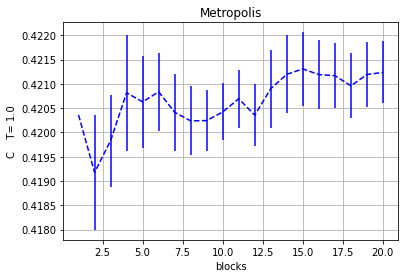

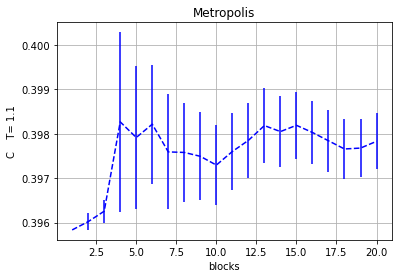

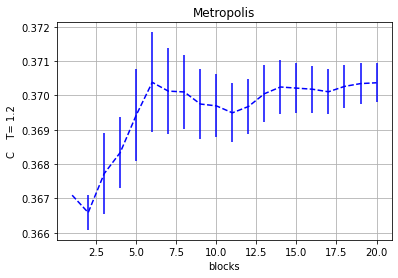

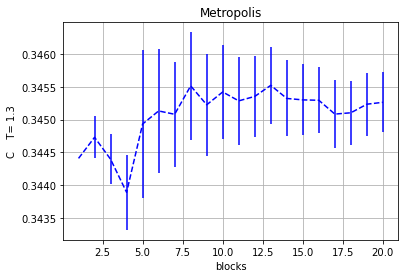

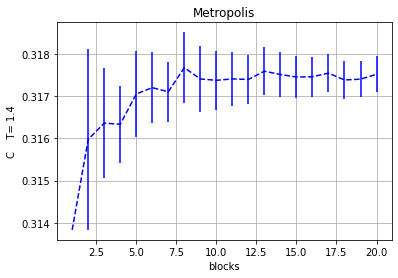

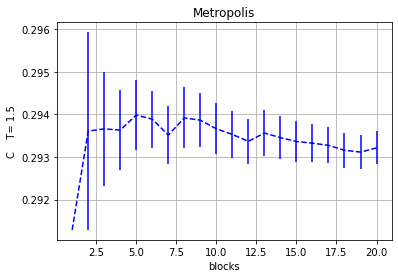

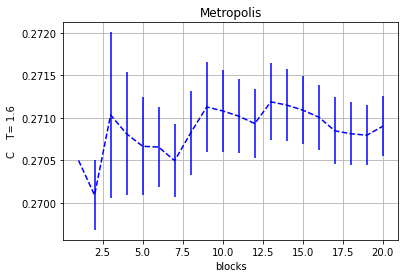

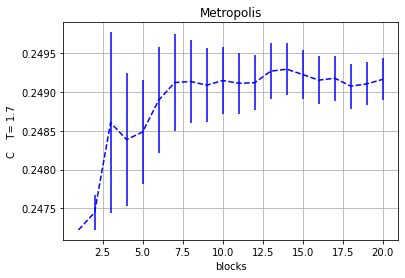

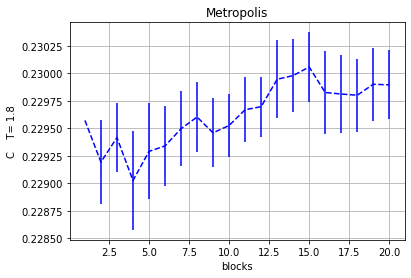

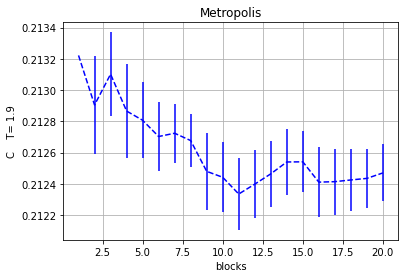

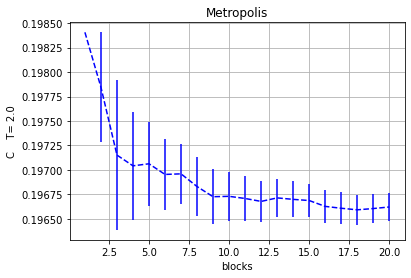

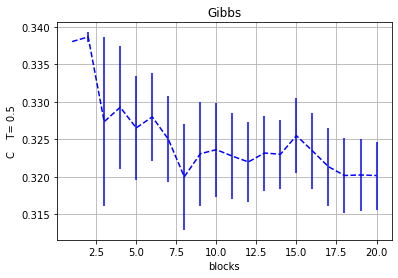

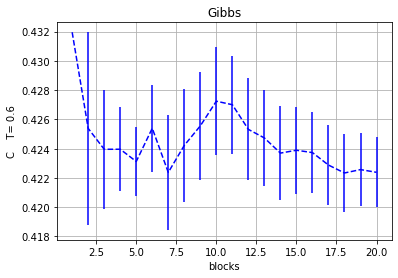

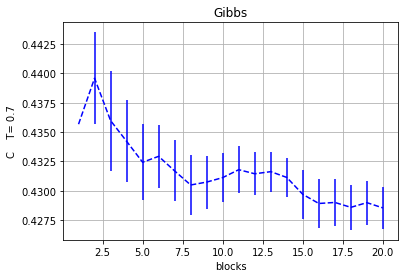

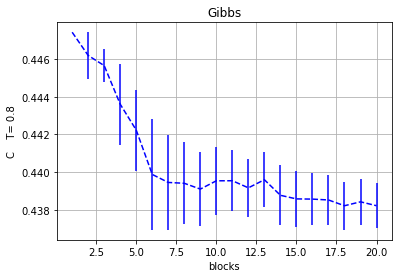

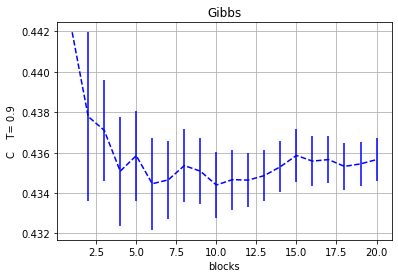

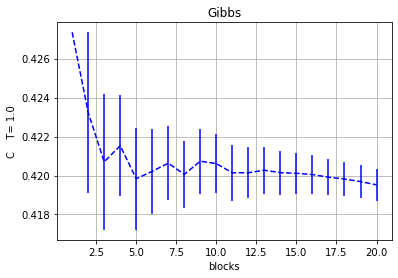

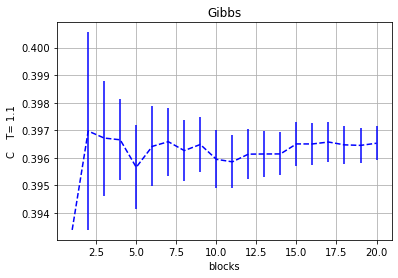

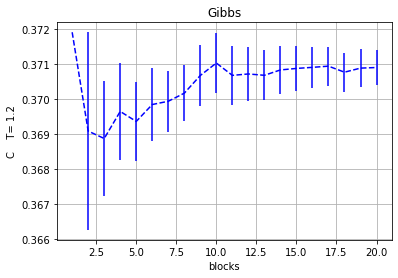

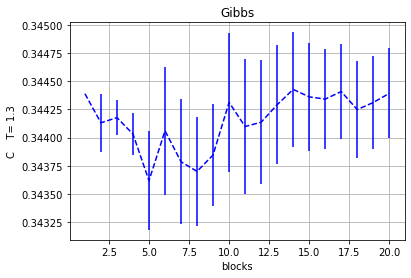

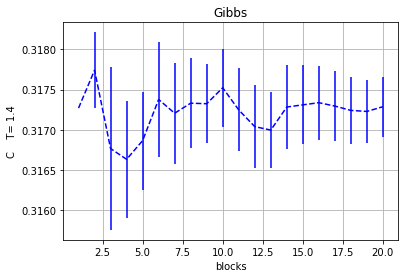

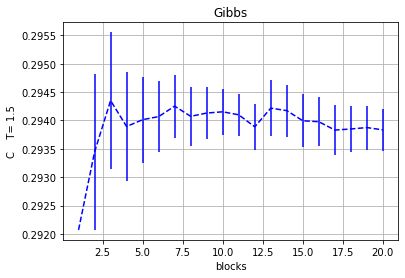

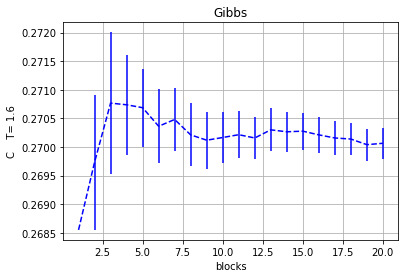

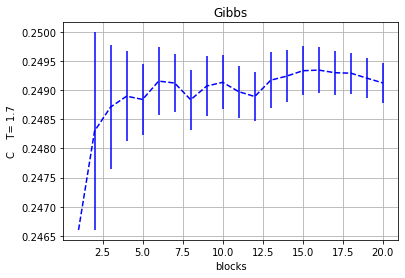

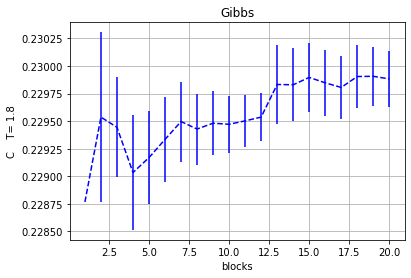

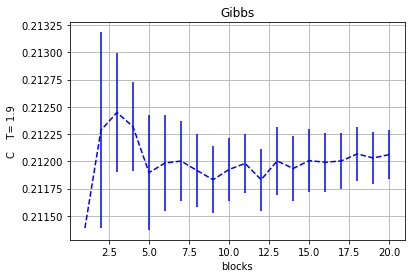

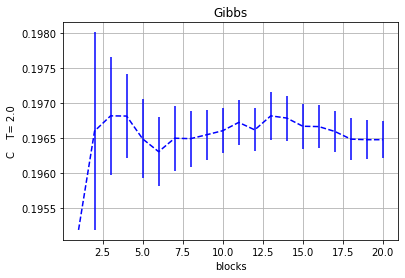

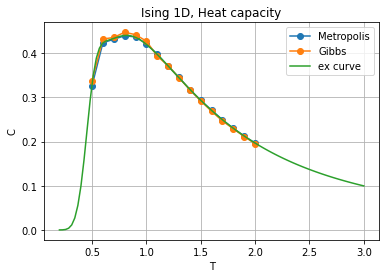

In [81]:
with open("ISING_1D/output.heat.0","r") as file:
    s=file.read()
    s=s.split("\n")
    l=[line.split(" ") for line in s]
    ll=[x for el in l for x in el if x!=""]


block=[float(i) for i in ll[::4]]
v=[float(i) for i in ll[2::4]]
err=[float(i) for i in ll[3::4]]
TT=[i/10+0.5 for i in range(16)] 

TT=TT*int(len(v)/20)
for i in range(int(len(v)/20)):
    plt.errorbar(block[i*20:i*20+20],v[i*20:i*20+20], yerr=err[i*20:i*20+20:],linestyle="dashed",color="blue")
    if(i<=15):
        plt.title("Metropolis")
    else:
        plt.title("Gibbs")
    plt.xlabel('blocks')
    plt.ylabel("C    T= "+str(TT[i]))
    plt.grid(True)
    plt.figure()

plt.plot(TT[:16],v[19:int(len(v)/2):20],marker='o', label='Metropolis')
plt.plot(TT[:16],v[int(len(v)/2)::20],marker='o', label='Gibbs')

plt.grid(True)
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat,label='ex curve')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.show()